EXPLORATORY DATA ANALYSIS

In [115]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df=pd.read_csv('obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [117]:
print(df.shape)
print(df.columns.tolist())

(1000, 7)
['Age', 'Gender', 'Height', 'Weight', 'BMI', 'PhysicalActivityLevel', 'ObesityCategory']


In [118]:
df.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [119]:
df.duplicated().sum()

np.int64(0)

In [120]:
for i in df.columns:
  print(f'Unique values of {i}: {df[i].nunique()}')
  print(f'{df[i].unique()}\n')

Unique values of Age: 62
[56 69 46 32 60 25 78 38 75 36 40 28 41 70 53 57 20 39 19 61 47 55 77 50
 29 42 66 44 76 59 45 33 79 64 68 72 74 54 24 26 35 21 31 67 43 37 52 34
 23 71 51 27 48 65 62 58 18 22 30 49 73 63]

Unique values of Gender: 2
['Male' 'Female']

Unique values of Height: 1000
[173.57526244 164.12730582 168.07220213 168.45963284 183.56856774
 166.40562726 183.56633382 142.87509508 183.47855781 182.97406115
 179.02254673 149.88081997 180.18886995 169.49880824 144.7066256
 182.98177708 184.44173079 150.95487928 171.75421075 183.88591121
 182.30161313 178.36061051 143.5274712  177.29542767 167.81896102
 179.95857529 172.56161458 169.8011839  176.40903849 168.28086629
 169.7572272  164.44776001 153.94591009 175.67853474 161.9396968
 167.99208134 172.86973958 149.14782356 151.38651096 167.00261423
 174.54563482 177.44038271 154.08685504 176.36631484 167.54930382
 161.16842755 163.51448144 178.01857332 172.74005785 170.50306523
 172.43495739 179.28097777 169.02900433 170.543188

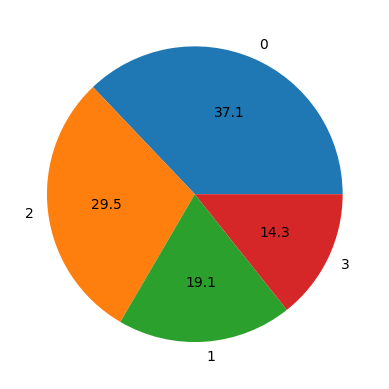

In [144]:
obesity_count=df['ObesityCategory'].value_counts()
plt.pie(obesity_count,labels=obesity_count.index,autopct='%.1f')
plt.savefig('plots/pie.png')
plt.show()

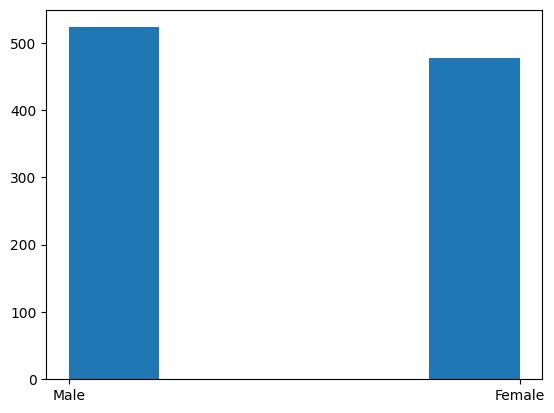

In [122]:
plt.hist(df['Gender'],bins=5)
plt.show()

In [123]:
from sklearn.preprocessing import LabelEncoder
label={}
for i in ['Gender','ObesityCategory']:
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[i].astype(str))
  label[i]=encoder

In [124]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,0
1,69,1,164.127306,89.959256,33.395209,2,1
2,46,0,168.072202,72.930629,25.817737,4,2
3,32,1,168.459633,84.886912,29.912247,3,2
4,60,1,183.568568,69.038945,20.487903,3,0


In [125]:
for i in df.columns:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR   #minimum threshold
  upper=Q3+1.5*IQR   #maximum threshold
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  print(f'{i}: {outlier} outliers')

Age: 0 outliers
Gender: 0 outliers
Height: 6 outliers
Weight: 11 outliers
BMI: 14 outliers
PhysicalActivityLevel: 0 outliers
ObesityCategory: 0 outliers


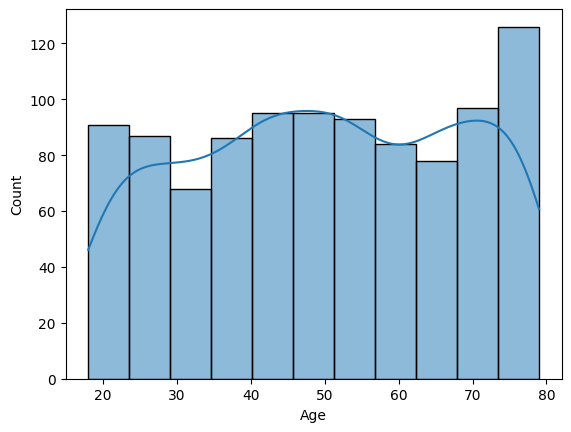

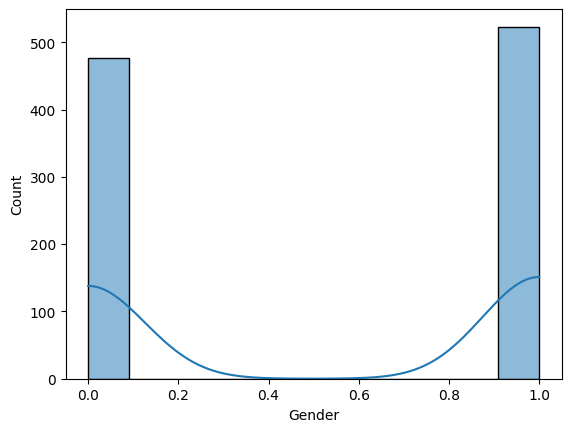

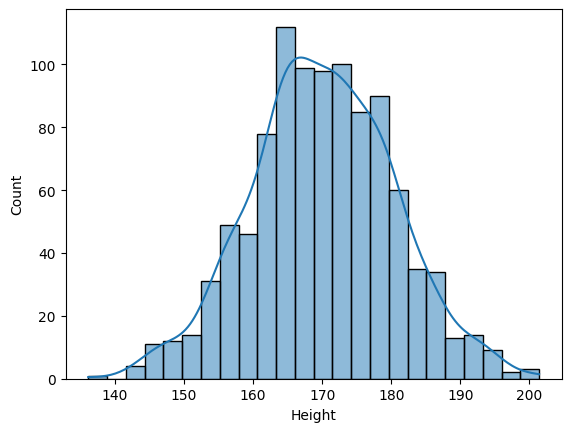

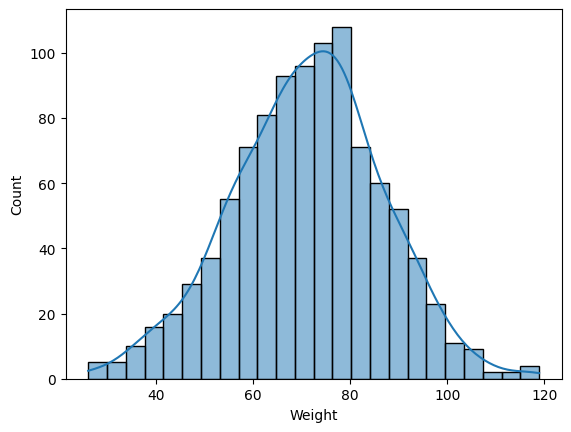

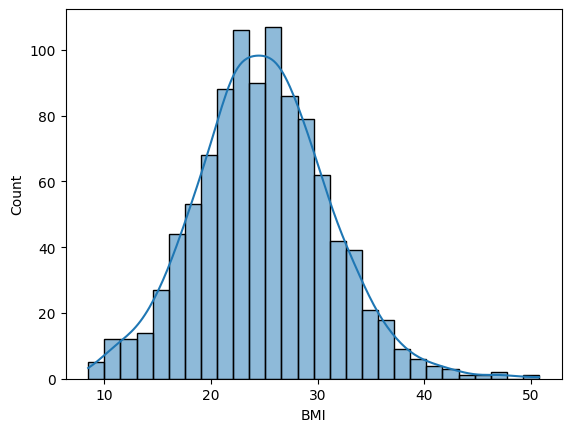

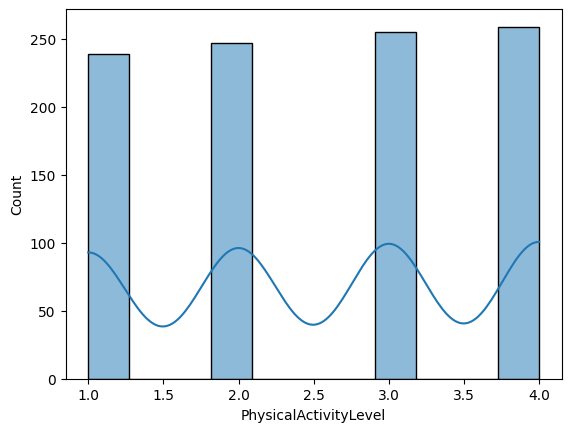

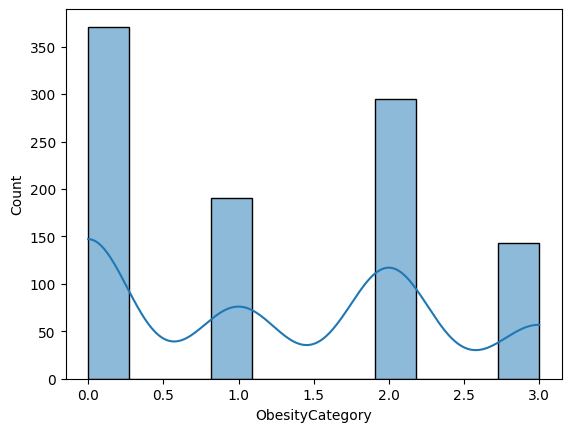

In [145]:
for i in df.columns:
  sns.histplot(df[i],kde=True)
  plt.savefig(f'plots/{i}.png')
  plt.show()

In [127]:
for i in df.columns:
  print(f'Skewness of {i}: ',df[i].skew())

Skewness of Age:  -0.06575522501530556
Skewness of Gender:  -0.0922359022863777
Skewness of Height:  0.009356949610187645
Skewness of Weight:  -0.09073322267642285
Skewness of BMI:  0.25287249891535973
Skewness of PhysicalActivityLevel:  -0.042192482793889756
Skewness of ObesityCategory:  0.23536773473838424


ML MODELS

In [128]:
X=df.drop('ObesityCategory',axis=1)
y=df['ObesityCategory']

In [129]:
y.value_counts(normalize=True)

ObesityCategory
0    0.371
2    0.295
1    0.191
3    0.143
Name: proportion, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

SVC

In [132]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

model1=SVC()

param_grid1={
  'C':[0.1,1,10,100],
  'kernel':['linear','rbf','poly','sigmoid']
}

grid1=GridSearchCV(model1,param_grid1,cv=5)
grid1.fit(X_train_scaled,y_train)

y_pred1=grid1.best_estimator_.predict(X_test_scaled)

print(f'Best Parameters: {grid1.best_params_}')
print(f'Accuracy: {accuracy_score(y_test,y_pred1)}')
print(f'Precision: {precision_score(y_test,y_pred1,average='weighted')}')
print(f'Recall: {recall_score(y_test,y_pred1,average='weighted')}')
print(f'f1: {f1_score(y_test,y_pred1,average='weighted')}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred1)}')

Best Parameters: {'C': 100, 'kernel': 'linear'}
Accuracy: 0.975
Precision: 0.9752054794520548
Recall: 0.975
f1: 0.9750452232899944
Confusion matrix:
 [[70  0  2  0]
 [ 0 32  0  0]
 [ 2  0 63  0]
 [ 1  0  0 30]]


KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

model2=KNeighborsClassifier()

param_grid2={
  'n_neighbors': list(range(1,21)),
  'weights': ['uniform','distance'],
  'p': [1,2]
}

grid2=GridSearchCV(model2,param_grid2,cv=5)
grid2.fit(X_train_scaled,y_train)

y_pred2=grid2.best_estimator_.predict(X_test_scaled)

print(f'Best Parameters: {grid2.best_params_}')
print(f'Accuracy: {accuracy_score(y_test,y_pred2)}')
print(f'Precision: {precision_score(y_test,y_pred2,average='weighted')}')
print(f'Recall: {recall_score(y_test,y_pred2,average='weighted')}')
print(f'f1: {f1_score(y_test,y_pred2,average='weighted')}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred2)}')

Best Parameters: {'n_neighbors': 18, 'p': 1, 'weights': 'distance'}
Accuracy: 0.9
Precision: 0.9060949547234165
Recall: 0.9
f1: 0.8983395439325124
Confusion matrix:
 [[68  0  4  0]
 [ 0 29  3  0]
 [ 2  2 61  0]
 [ 9  0  0 22]]


DECISION TREE

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

model3=DecisionTreeClassifier()

param_grid3={
  'max_depth':[2,3,5],
  'min_samples_split':[3,4,5],
  'min_samples_leaf': [1,2,4]
}

grid3=GridSearchCV(model3,param_grid3,cv=5)
grid3.fit(X_train,y_train)

y_pred3=grid3.best_estimator_.predict(X_test)

print(f'Best Parameters: {grid3.best_params_}')
print(f'Accuracy: {accuracy_score(y_test,y_pred3)}')
print(f'Precision: {precision_score(y_test,y_pred3,average='weighted')}')
print(f'Recall: {recall_score(y_test,y_pred3,average='weighted')}')
print(f'f1: {f1_score(y_test,y_pred3,average='weighted')}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred3)}')

Best Parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1: 1.0
Confusion matrix:
 [[72  0  0  0]
 [ 0 32  0  0]
 [ 0  0 65  0]
 [ 0  0  0 31]]


RANDOM FOREST

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

model4=RandomForestClassifier()

param_grid4={
  'n_estimators':[10,50,100],
  'max_depth': [2,3,4],
  'min_samples_split':[3,6,7],
  'min_samples_leaf':[1,2,4]
}

grid4=GridSearchCV(model4,param_grid4,cv=5)
grid4.fit(X_train,y_train)

y_pred4=grid4.best_estimator_.predict(X_test)

print(f'Best Parameters: {grid4.best_params_}')
print(f'Accuracy: {accuracy_score(y_test,y_pred4)}')
print(f'Precision: {precision_score(y_test,y_pred4,average='weighted')}')
print(f'Recall: {recall_score(y_test,y_pred4,average='weighted')}')
print(f'f1: {f1_score(y_test,y_pred4,average='weighted')}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred4)}')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}
Accuracy: 0.995
Precision: 0.9950757575757575
Recall: 0.995
f1: 0.994979401429783
Confusion matrix:
 [[72  0  0  0]
 [ 0 31  1  0]
 [ 0  0 65  0]
 [ 0  0  0 31]]


XgBOOST

In [136]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

model5=XGBClassifier()

param_grid5={
  'n_estimators':[10,50,100],
  'max_depth':[2,4,7],
  'learning_rate':[0.1,0.01,1,10,100]
}

grid5=GridSearchCV(model5,param_grid5,cv=5)
grid5.fit(X_train,y_train)

y_pred5=grid5.best_estimator_.predict(X_test)

print(f'Best Parameters: {grid5.best_params_}')
print(f'Accuracy: {accuracy_score(y_test,y_pred5)}')
print(f'Precision: {precision_score(y_test,y_pred5,average='weighted')}')
print(f'Recall: {recall_score(y_test,y_pred5,average='weighted')}')
print(f'f1: {f1_score(y_test,y_pred5,average='weighted')}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred5)}')

Best Parameters: {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 50}
Accuracy: 0.98
Precision: 0.9802151113013698
Recall: 0.98
f1: 0.9799935846030473
Confusion matrix:
 [[71  0  0  1]
 [ 0 31  1  0]
 [ 2  0 63  0]
 [ 0  0  0 31]]


GRADIENT BOOSTING

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

model6=GradientBoostingClassifier()

param_grid6={
  'n_estimators':[10,50,100],
  'max_depth':[2,4,5],
  'learning_rate':[0.1,0.01,1,10,100]
}

grid6=GridSearchCV(model6,param_grid6,cv=5)
grid6.fit(X_train,y_train)

y_pred6=grid6.best_estimator_.predict(X_test)

print(f'Best Parameters: {grid5.best_params_}')
print(f'Accuracy: {accuracy_score(y_test,y_pred5)}')
print(f'Precision: {precision_score(y_test,y_pred5,average='weighted')}')
print(f'Recall: {recall_score(y_test,y_pred5,average='weighted')}')
print(f'f1: {f1_score(y_test,y_pred5,average='weighted')}')
print(f'Confusion matrix:\n {confusion_matrix(y_test,y_pred5)}')

Best Parameters: {'learning_rate': 1, 'max_depth': 2, 'n_estimators': 50}
Accuracy: 0.98
Precision: 0.9802151113013698
Recall: 0.98
f1: 0.9799935846030473
Confusion matrix:
 [[71  0  0  1]
 [ 0 31  1  0]
 [ 2  0 63  0]
 [ 0  0  0 31]]


In [143]:
import pickle
with open('model.pkl','wb') as fp:
  pickle.dump(grid3.best_estimator_,fp)

with open('encoder.pkl','wb') as fp:
  pickle.dump(label,fp)